
I am importing the required libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`) and loading the dataset using **pandas**.  


In [1]:

# Importing The Necessary Librarires for the Dataset


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

The dataset is read using `pd.read_csv()`  function with the `;` separator as mentioned in the code.  
We then display the first few rows to get an overview of the data.
To understand the dataset better, I am using the :
- Using `.info()`  command to  display the column names and  data types of the datasetcoloumns.
- Using `.describe()` to generate basic statistical data  for numeric columns of the dataset.

In [2]:


#Loading the Dataset using the read_csv function
StudentMaths = pd.read_csv('./Dataset/student-mat.csv', sep=';')


print(StudentMaths.describe())


#Providing a short summary of all the coloums in the dataset
print(StudentMaths.info())
print("\n")

# Displaying the first 5 rows of the dataset    
print("First 5 rows of the dataset:")

print(StudentMaths.head().to_string())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

We are  Checking  for **missing values** in the dataset using `.isnull().sum()` command in the Pandas. With this i can understand data quality and potential issues before cleaning

In [3]:
print("\n");

# Analyzing the Number of Missing Values in the Dataset
print("The Total Number of Missing Values in the Dataset:")
print(StudentMaths.isnull().sum().sum())

print("\n The Missing Values per Column in the Dataset:")
print(StudentMaths.isnull().sum().to_string())


print("\n")
print("In this Dataset we have observed that there are no missing values in any of the columns of the dataset.")



The Total Number of Missing Values in the Dataset:
0

 The Missing Values per Column in the Dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0


In this Dataset we have observed that there are no missing values in any of the columns of the dataset.


We are Checking the size of the dataset using `.shape` command .



In [4]:
# Displaying the Datatypes of each of the columns in the Dataset

print("Here We are displaying the Datatypes of each of the columns in the Dataset: \n")
print(StudentMaths.dtypes.to_string())

#Displaying the Size of the Dataset or Parameters of the Dataset
print("\n")
print("The Size of the Dataset is: " , StudentMaths.shape)

Here We are displaying the Datatypes of each of the columns in the Dataset: 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64


The Size of the Dataset is:  (395, 33)


Data cleaning ensures the dataset is reliable and consistent:
We checking and removing the  **duplicate rows** using `.drop_duplicates()` Command.
We  are defining an **imputation function** to handle missing values of the Dataset here:

In [5]:
# Identify and Removing Duplicated Entries in the Dataset
DuplicateRowsum = StudentMaths.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", StudentMaths[StudentMaths.duplicated()])
print("\n")
database_withDuplicatedRowsGone = StudentMaths.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head().to_string())
print("\n")

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


The Database Without the Duplicaed Rows Here 
    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  studytime  failures schoolsup famsup paid activities nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2          2         0       yes     no   no         no     yes    yes       no       no       4         3      4     1     1       3         6   5   6   6
1     GP   F   17       U     GT3       T     1     1  at_hom

 - Numeric columns are basically being filled with the **median**.
  - Categorical columns are basically being filled with the **mode**.
  - Datetime columnsare basically being interpolated using time.
Even though our dataset has no missing values, this function ensures robustness and safety

In [6]:

# This function Bascially Replaces all the missing Entries in the dataframe with some other value fills numeric columns with their median, fills categorical columns with their mode, interpolates missing values in datetime columns.


def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database
Database_After_Imputation = Imputation_Of_Values(StudentMaths)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head().to_string())

Filled NaN in categorical column 'school' with mode = GP
Filled NaN in categorical column 'sex' with mode = F
Filled NaN in numeric column 'age' with Median = 17.0
Filled NaN in categorical column 'address' with mode = U
Filled NaN in categorical column 'famsize' with mode = GT3
Filled NaN in categorical column 'Pstatus' with mode = T
Filled NaN in numeric column 'Medu' with Median = 3.0
Filled NaN in numeric column 'Fedu' with Median = 2.0
Filled NaN in categorical column 'Mjob' with mode = other
Filled NaN in categorical column 'Fjob' with mode = other
Filled NaN in categorical column 'reason' with mode = course
Filled NaN in categorical column 'guardian' with mode = mother
Filled NaN in numeric column 'traveltime' with Median = 1.0
Filled NaN in numeric column 'studytime' with Median = 2.0
Filled NaN in numeric column 'failures' with Median = 0.0
Filled NaN in categorical column 'schoolsup' with mode = no
Filled NaN in categorical column 'famsup' with mode = yes
Filled NaN in catego


We are gettingthe results to the key analytical questions using pandas and numpy:
1. **Average Score in Maths (G3):**  We are Calculating using `.mean()`.
2. **Count of Students with G3 > 15:** Is Derived Using boolean indexing and `.sum()`.
3. **Correlation between Study Time and Final Grade (G3):**  Is Derived Using The `.corr()`.
4. **Higher Average Final Grade by Gender:** Is Derived Using `.groupby()` and `.mean()` command these tasks are acheived here.  



In [7]:
print("\n")
# Function to calculate the average score in math (G3)
def Calcuateavg_Maths(database):
    matavg_score = database['G3'].mean()
    print(f"The Average Score in Maths is: {matavg_score}")
    return matavg_score

# Function to count the number of students who scored above 15 in their final grade (G3)
def Count15_finalGrd(database):
    stdabv15 = (database['G3'] > 15).sum()  
    print(f"The Number of Students who scored above 15 in their final grade is: {stdabv15}")
    return stdabv15

# Function to calculate the correlation between study time (studytime) and the final grade (G3)
def linkbtwcol1andcol2_Study_Time_Final_Grade(database):  
    link_btw_col1andcol2 = database['studytime'].corr(database['G3'])
    print(f"The correlation between study time and the final grade is: {link_btw_col1andcol2}")

    return link_btw_col1andcol2

# Function to calculate the average final grade (G3) by gender
def Higheravggender(database):
    gender_average_by_data = database.groupby('sex')['G3'].mean()  
    highest_gender_averagescore = gender_average_by_data.idxmax()  # gender with highest avg
    print("Average Final Grade by Gender:\n", gender_average_by_data)
    print(f"Higher average grade: {highest_gender_averagescore} = {gender_average_by_data[highest_gender_averagescore]}")
    return highest_gender_averagescore, gender_average_by_data[highest_gender_averagescore]

# Displaying the Results of the Analysis
print("\nResults of the Data Analysis:")
result1 = Calcuateavg_Maths(Database_After_Imputation)
result2 = Count15_finalGrd(Database_After_Imputation)
result3 = linkbtwcol1andcol2_Study_Time_Final_Grade(Database_After_Imputation)
avg_final_grade , result4 = Higheravggender(Database_After_Imputation)

print("\nSummary:")
print("Average final grade (G3):", result1)
print("Number of students with G3 > 15:", result2)
print("Correlation between studytime and G3:", result3)
print(f"Gender with higher average G3: {avg_final_grade} (average = {result4})")





Results of the Data Analysis:
The Average Score in Maths is: 10.415189873417722
The Number of Students who scored above 15 in their final grade is: 40
The correlation between study time and the final grade is: 0.09781968965319636
Average Final Grade by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64
Higher average grade: M = 10.914438502673796

Summary:
Average final grade (G3): 10.415189873417722
Number of students with G3 > 15: 40
Correlation between studytime and G3: 0.09781968965319636
Gender with higher average G3: M (average = 10.914438502673796)



In Order for a better understanding of  the dataset, we  are use **matplotlib** and **seaborn** for plotting:

1. **Histogram of Final Grades (G3):**
   It is Showing the distribution of students’ final grades.
2. **Scatter Plot (Study Time vs Final Grade):**
   It Helps to visualize the relationship between study time and performance.
   It Includes gender as a color hue for comparison.
3. **Bar Chart (Average Final Grade by Gender):**
   It is Comparing performance between male and female students.





  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason guardian  traveltime  studytime  failures schoolsup famsup paid activities nursery higher internet romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  course   mother           2          2         0       yes     no   no         no     yes    yes       no       no       4         3      4     1     1       3         6   5   6   6
1     GP   F   17       U     GT3       T     1     1  at_home     other  course   father           1          2         0        no    yes   no         no      no    yes      yes       no       5         3      3     1     1       3         4   5   5   6
2     GP   F   15       U     LE3       T     1     1  at_home     other   other   mother           1          2         3       yes     no  yes         no     yes    yes      yes       no       4         3      2     2     3     

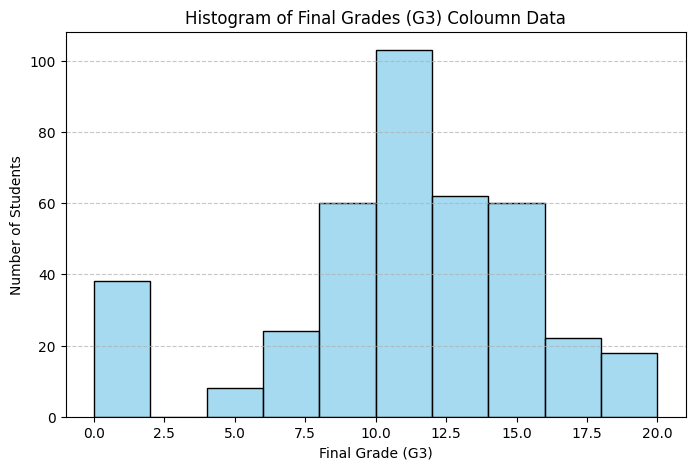

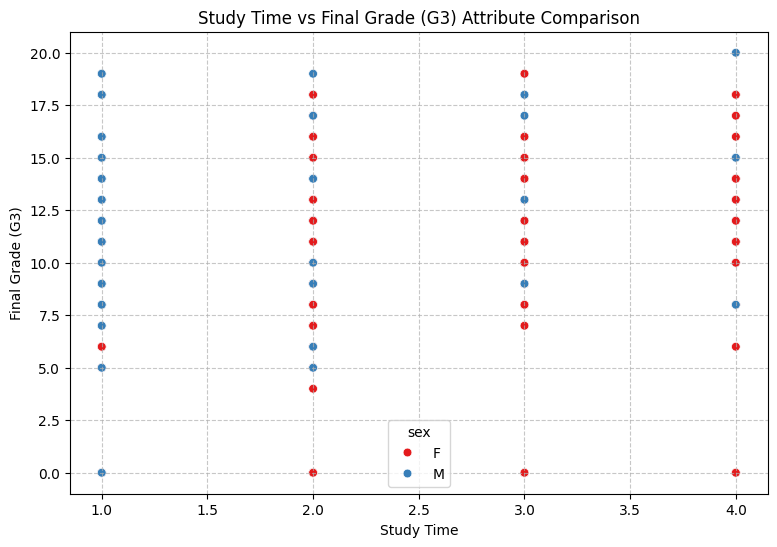

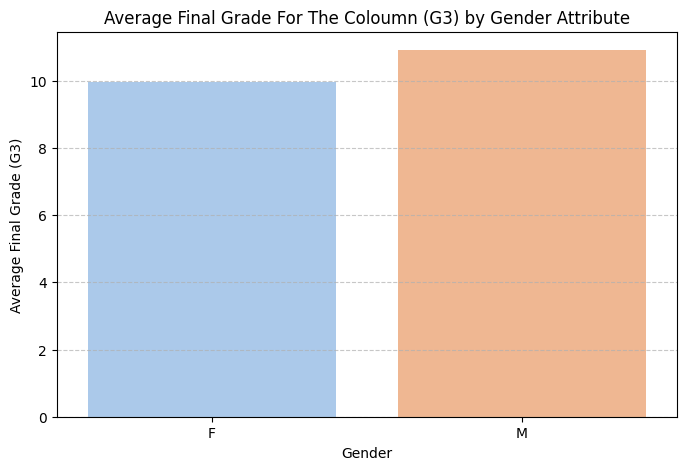

In [8]:
'''
Data Visualization
1. Plot a histogram of final grades (G3).
2. Create a scatter plot between study time (study time) and final grade (G3).
3. Create a bar chart comparing the average scores of male and female students.

'''

# Reimporting the necessary libraries for data visualization To make sure everything is in place
import matplotlib.pyplot as plt
import seaborn as sns  


print("\n")
print(Database_After_Imputation.head().to_string())

# Histogram of final grades (G3)
def histogram_by_Finalgrade(dataframe):
    plt.figure(figsize=(8, 5))
    sns.histplot(dataframe['G3'], bins=10, kde=False, color='skyblue', edgecolor='black')
    plt.title('Histogram of Final Grades (G3) Coloumn Data')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Number of Students')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#  Scatter plot between study time and final grade
def scatterplt_of_studytime_finalgrade(dataframe):
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x='studytime', y='G3', data=dataframe, hue='sex', palette='Set1', s=40)
    plt.title('Study Time vs Final Grade (G3) Attribute Comparison')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

#  Bar chart comparing average scores of male and female students
def average_score_by_gender(dataframe):
    plt.figure(figsize=(8, 5))
    avg_scores = dataframe.groupby('sex')['G3'].mean().reset_index()
    sns.barplot(x='sex', y='G3', hue='sex', data=avg_scores, palette='pastel', legend=False)
    plt.title('Average Final Grade For The Coloumn (G3) by Gender Attribute')
    plt.xlabel('Gender')
    plt.ylabel('Average Final Grade (G3)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


histogram_by_Finalgrade(Database_After_Imputation)
scatterplt_of_studytime_finalgrade(Database_After_Imputation)
average_score_by_gender(Database_After_Imputation)


The Final Code Has Been Provied In a **Single Jupyter Notebook Cell** As Specified In the **Constraints**

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

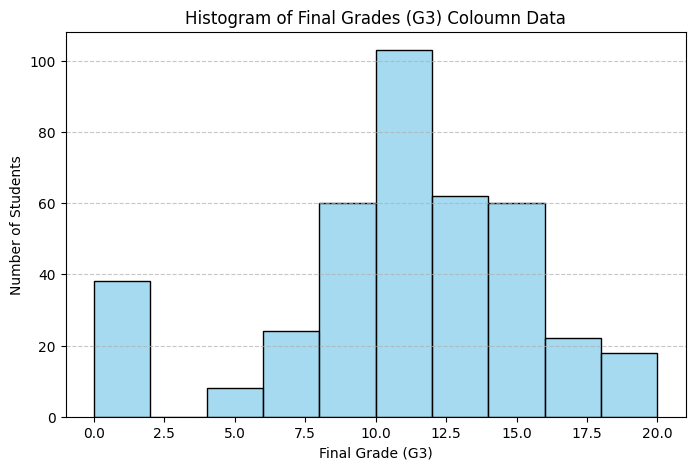

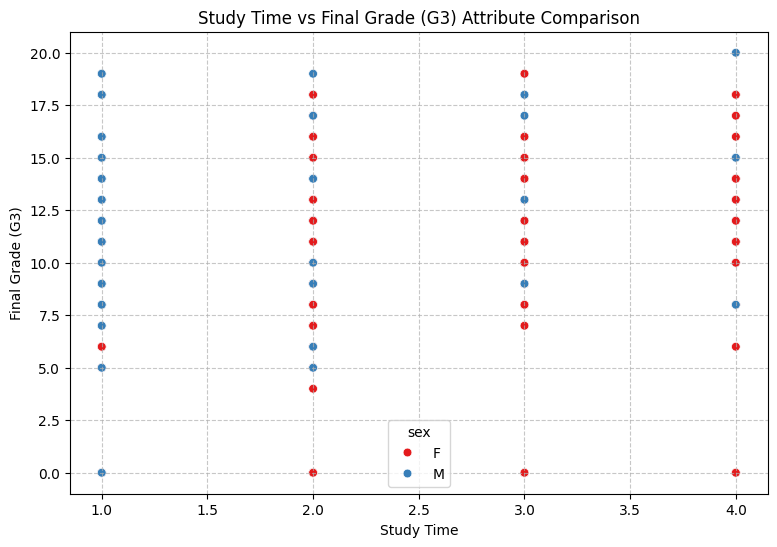

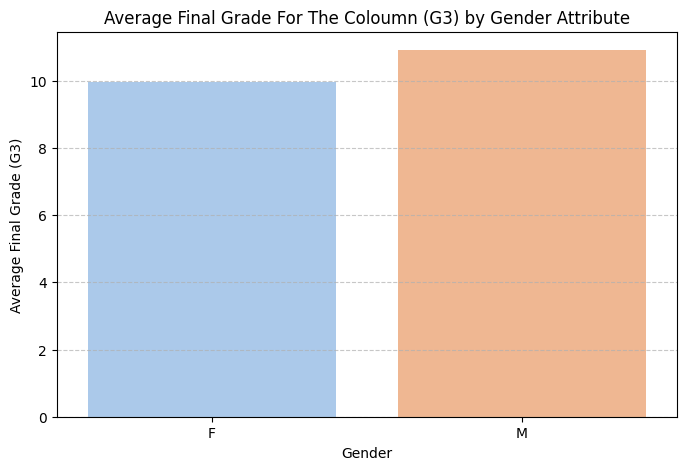

In [9]:
# The Whole Code Has Been Written In A Single Code Cell Here As Provided in The Pdf
# Importing The Necessary Librarires for the Dataset


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt




#Loading the Dataset using the read_csv function
StudentMaths = pd.read_csv('./Dataset/student-mat.csv', sep=';')


print(StudentMaths.describe())

#Providing a short summary of all the coloums in the dataset
print(StudentMaths.info())
print("\n")

# Displaying the first 5 rows of the dataset    
print("First 5 rows of the dataset:")

print(StudentMaths.head().to_string())


print("\n");

# Analyzing the Number of Missing Values in the Dataset
print("The Total Number of Missing Values in the Dataset:")
print(StudentMaths.isnull().sum().sum())

print("\n The Missing Values per Column in the Dataset:")
print(StudentMaths.isnull().sum().to_string())


print("\n")
print("In this Dataset we have observed that there are no missing values in any of the columns of the dataset.")


print("\n");

# Analyzing the Number of Missing Values in the Dataset
print("The Total Number of Missing Values in the Dataset:")
print(StudentMaths.isnull().sum().sum())

print("\n The Missing Values per Column in the Dataset:")
print(StudentMaths.isnull().sum().to_string())


print("\n")
print("In this Dataset we have observed that there are no missing values in any of the columns of the dataset.")


# Displaying the Datatypes of each of the columns in the Dataset

print("Here We are displaying the Datatypes of each of the columns in the Dataset: \n")
print(StudentMaths.dtypes.to_string())

#Displaying the Size of the Dataset or Parameters of the Dataset
print("\n")
print("The Size of the Dataset is: " , StudentMaths.shape)


# Identify and Removing Duplicated Entries in the Dataset
DuplicateRowsum = StudentMaths.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", StudentMaths[StudentMaths.duplicated()])
print("\n")
database_withDuplicatedRowsGone = StudentMaths.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head().to_string())
print("\n")



# This function Bascially Replaces all the missing Entries in the dataframe with some other value fills numeric columns with their median, fills categorical columns with their mode, interpolates missing values in datetime columns.


def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with mean = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database
Database_After_Imputation = Imputation_Of_Values(StudentMaths)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head().to_string())


print("\n")
# Function to calculate the average score in math (G3)
def Calcuateavg_Maths(database):
    matavg_score = database['G3'].mean()
    print(f"The Average Score in Maths is: {matavg_score}")
    return matavg_score

# Function to count the number of students who scored above 15 in their final grade (G3)
def Count15_finalGrd(database):
    stdabv15 = (database['G3'] > 15).sum()  
    print(f"The Number of Students who scored above 15 in their final grade is: {stdabv15}")
    return stdabv15

# Function to calculate the correlation between study time (studytime) and the final grade (G3)
def linkbtwcol1andcol2_Study_Time_Final_Grade(database):  
    link_btw_col1andcol2 = database['studytime'].corr(database['G3'])
    print(f"The correlation between study time and the final grade is: {link_btw_col1andcol2}")

    return link_btw_col1andcol2

# Function to calculate the average final grade (G3) by gender
def Higheravggender(database):
    gender_average_by_data = database.groupby('sex')['G3'].mean()  
    highest_gender_averagescore = gender_average_by_data.idxmax()  # gender with highest avg
    print("Average Final Grade by Gender:\n", gender_average_by_data)
    print(f"Higher average grade: {highest_gender_averagescore} = {gender_average_by_data[highest_gender_averagescore]}")
    return highest_gender_averagescore, gender_average_by_data[highest_gender_averagescore]

# Displaying the Results of the Analysis
print("\nResults of the Data Analysis:")
result1 = Calcuateavg_Maths(Database_After_Imputation)
result2 = Count15_finalGrd(Database_After_Imputation)
result3 = linkbtwcol1andcol2_Study_Time_Final_Grade(Database_After_Imputation)
avg_final_grade , result4 = Higheravggender(Database_After_Imputation)

print("\nSummary:")
print("Average final grade (G3):", result1)
print("Number of students with G3 > 15:", result2)
print("Correlation between studytime and G3:", result3)
print(f"Gender with higher average G3: {avg_final_grade} (average = {result4})")

'''
Data Visualization
1. Plot a histogram of final grades (G3).
2. Create a scatter plot between study time (study time) and final grade (G3).
3. Create a bar chart comparing the average scores of male and female students.

'''

# Reimporting the necessary libraries for data visualization To make sure everything is in place
import matplotlib.pyplot as plt
import seaborn as sns  


print("\n")
print(Database_After_Imputation.head().to_string())

# Histogram of final grades (G3)
def histogram_by_Finalgrade(dataframe):
    plt.figure(figsize=(8, 5))
    sns.histplot(dataframe['G3'], bins=10, kde=False, color='skyblue', edgecolor='black')
    plt.title('Histogram of Final Grades (G3) Coloumn Data')
    plt.xlabel('Final Grade (G3)')
    plt.ylabel('Number of Students')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#  Scatter plot between study time and final grade
def scatterplt_of_studytime_finalgrade(dataframe):
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x='studytime', y='G3', data=dataframe, hue='sex', palette='Set1', s=40)
    plt.title('Study Time vs Final Grade (G3) Attribute Comparison')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()


#  Bar chart comparing average scores of male and female students
def average_score_by_gender(dataframe):
    plt.figure(figsize=(8, 5))
    avg_scores = dataframe.groupby('sex')['G3'].mean().reset_index()
    sns.barplot(x='sex', y='G3', hue='sex', data=avg_scores, palette='pastel', legend=False)
    plt.title('Average Final Grade For The Coloumn (G3) by Gender Attribute')
    plt.xlabel('Gender')
    plt.ylabel('Average Final Grade (G3)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage:
histogram_by_Finalgrade(Database_After_Imputation)
scatterplt_of_studytime_finalgrade(Database_After_Imputation)
average_score_by_gender(Database_After_Imputation)


